In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [6]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [7]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [8]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)



In [9]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [ ]:
# Find the most recent date in the data set.


In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
previous_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
query = session.query(measurement.date, measurement.prcp).filter(measurement.date >= previous_year).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(query, columns=['date', 'precipitation'])
precip_df.set_index(precip_df['date'], inplace = True)
precip_df.head()

# Sort the dataframe by date




,date,precipitation
date,,
2016-08-23,2016-08-23,0.00
2016-08-24,2016-08-24,0.08
2016-08-25,2016-08-25,0.08
2016-08-26,2016-08-26,0.00
2016-08-27,2016-08-27,0.00


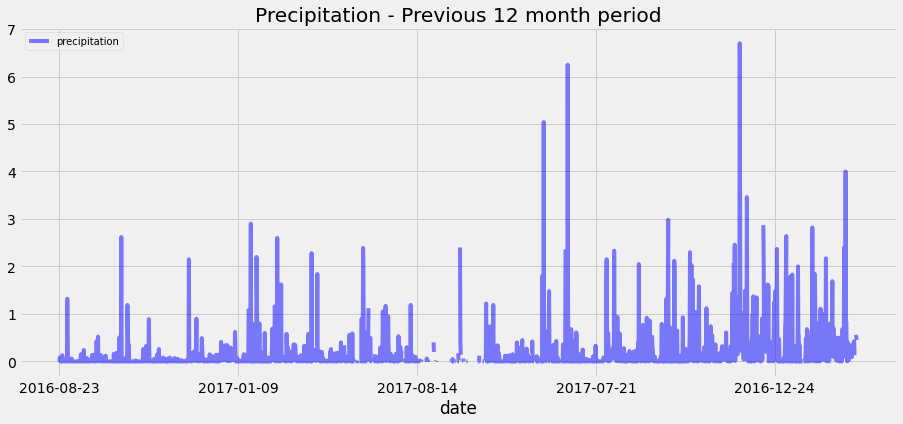

In [14]:

# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot(title="Precipitation - Previous 12 month period", color = 'blue', alpha = .5, figsize = (14,6))
plt.legend(loc = 'upper left', prop = {'size': 10})
plt.savefig("Images/precipitation.png")
plt.show()


In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number stations in the dataset
available_stations = session.query(measurement.station).distinct().count()
print(f'There are {available_stations} stations available.')

There are 9 stations available.


In [17]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).\
order_by(func.count(measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [18]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
filter(measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [19]:
# Using the most active station id
highest_number_of_temperature_observations = session.query(measurement.station, func.count(measurement.tobs)).\
group_by(measurement.station).order_by(func.count(measurement.station).desc()).first()
highest_number_of_temperature_observations



('USC00519281', 2772)

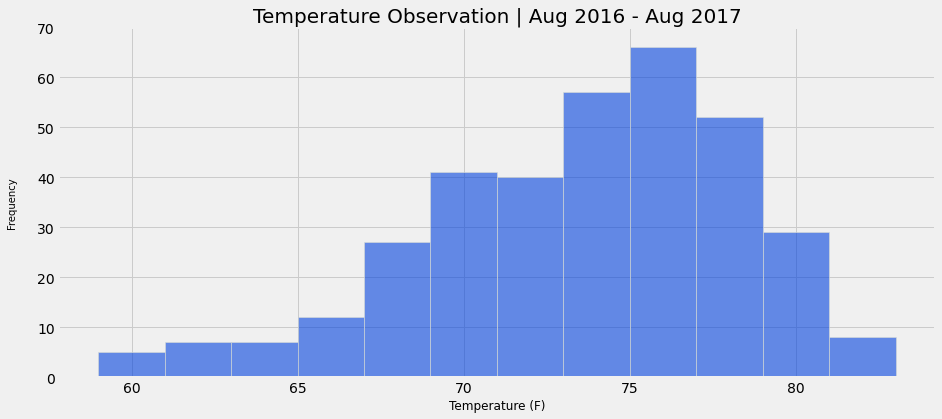

In [22]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
twelve_months_of_temperature_observation=(session.query(measurement.date,(measurement.tobs))
                  .filter(func.strftime(measurement.date) > previous_year)
                  .filter(measurement.station=='USC00519281')
                  .all())
twelve_months_of_temperature_observation

twelve_months_of_temperature_observation_df=pd.DataFrame(twelve_months_of_temperature_observation)
twelve_months_of_temperature_observation_df.set_index('date',inplace=True)

plt.rcParams['figure.figsize']=(14,6)
plt.hist(twelve_months_of_temperature_observation_df['tobs'],bins=12,alpha=0.6,edgecolor='xkcd:light gray',
         linewidth=1,color='xkcd:blue')

plt.title('Temperature Observation | Aug 2016 - Aug 2017',fontsize=20)
plt.xlabel('Temperature (F)',fontsize=12,color='black')
plt.ylabel('Frequency',fontsize=10,color='black',labelpad=20)
plt.ylim(0,70)
plt.savefig("Images/TemperatureObservation.png")
plt.show()

# Close session

In [ ]:
# Close Session
session.close()